# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
number = 0
sets = 1

# variables to collect
city_data = {"City": [],
       "Cloudiness": [],
       "Country": [],
       "Date": [],
       "Humidity": [],
       "Lat": [],
       "Lng": [],
       "Max Temp": [],
       "Wind Speed": []}


# set up initial message
print(f"Beginning Data Retrieval")
print("-------------------------")

# Build query URL
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    number = number + 1
    if number == 51:
        sets = sets+1
        number = 1
    try:
        print(f"Processing Record {number} of Set {sets} | {city}")
        city_data["City"].append(response['name'])
        city_data["Cloudiness"].append(response['clouds']['all'])
        city_data["Country"].append(response['sys']['country'])
        city_data["Date"].append(response['dt'])
        city_data["Humidity"].append(response['main']['humidity'])
        city_data["Lat"].append(response['coord']['lat'])
        city_data["Lng"].append(response['coord']['lon'])
        city_data["Max Temp"].append(response['main']['temp_max'])
        city_data["Wind Speed"].append(response['wind']['speed'])
    except:
        print("City not found. Skipping ...")
    time.sleep(.2)

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | shu
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping ...
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | pogar
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | labuhan
Processing Record 9 of Set 1 | dunedin
Processing Record 10 of Set 1 | vila velha
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | bukama
Processing Record 19 of Set 1 | lata
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping ...
Processing Record 22 of Set 1 | qaanaaq
Proc

Processing Record 34 of Set 4 | husavik
Processing Record 35 of Set 4 | tadine
Processing Record 36 of Set 4 | vardo
Processing Record 37 of Set 4 | kikwit
Processing Record 38 of Set 4 | mokrousovo
Processing Record 39 of Set 4 | salinopolis
Processing Record 40 of Set 4 | ancud
Processing Record 41 of Set 4 | gazni
City not found. Skipping ...
Processing Record 42 of Set 4 | tambacounda
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | shubarkuduk
Processing Record 45 of Set 4 | lasa
Processing Record 46 of Set 4 | launceston
Processing Record 47 of Set 4 | necochea
Processing Record 48 of Set 4 | taltal
Processing Record 49 of Set 4 | waipawa
Processing Record 50 of Set 4 | gurgan
City not found. Skipping ...
Processing Record 1 of Set 5 | bolungarvik
City not found. Skipping ...
Processing Record 2 of Set 5 | ostrovnoy
Processing Record 3 of Set 5 | bilibino
Processing Record 4 of Set 5 | barcelos
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of

Processing Record 26 of Set 8 | shenjiamen
Processing Record 27 of Set 8 | tasiilaq
Processing Record 28 of Set 8 | botwood
Processing Record 29 of Set 8 | pangnirtung
Processing Record 30 of Set 8 | fuerte
Processing Record 31 of Set 8 | harindanga
Processing Record 32 of Set 8 | camopi
Processing Record 33 of Set 8 | moron
Processing Record 34 of Set 8 | asau
Processing Record 35 of Set 8 | matagami
Processing Record 36 of Set 8 | mogzon
Processing Record 37 of Set 8 | sancoale
Processing Record 38 of Set 8 | ostrov
Processing Record 39 of Set 8 | griffith
Processing Record 40 of Set 8 | kununurra
Processing Record 41 of Set 8 | dhidhdhoo
Processing Record 42 of Set 8 | johnstown
Processing Record 43 of Set 8 | ndioum
Processing Record 44 of Set 8 | panama city
Processing Record 45 of Set 8 | valparaiso
Processing Record 46 of Set 8 | eyl
Processing Record 47 of Set 8 | hualmay
Processing Record 48 of Set 8 | mehamn
Processing Record 49 of Set 8 | anchorage
Processing Record 50 of Se

Processing Record 13 of Set 12 | ugoofaaru
Processing Record 14 of Set 12 | aksha
Processing Record 15 of Set 12 | fairbanks
Processing Record 16 of Set 12 | tarn taran
Processing Record 17 of Set 12 | lakeville
Processing Record 18 of Set 12 | humaita
Processing Record 19 of Set 12 | elko
Processing Record 20 of Set 12 | brae
Processing Record 21 of Set 12 | dalnerechensk
Processing Record 22 of Set 12 | sembe
Processing Record 23 of Set 12 | ojinaga
Processing Record 24 of Set 12 | whitehorse
Processing Record 25 of Set 12 | werda
Processing Record 26 of Set 12 | wittmund
Processing Record 27 of Set 12 | nyurba
Processing Record 28 of Set 12 | oltu
Processing Record 29 of Set 12 | inuvik
Processing Record 30 of Set 12 | mecca
Processing Record 31 of Set 12 | katherine
Processing Record 32 of Set 12 | mae sai
Processing Record 33 of Set 12 | belmonte
Processing Record 34 of Set 12 | zambrow
Processing Record 35 of Set 12 | kuito
Processing Record 36 of Set 12 | easton
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather = pd.DataFrame(city_data)
city_weather.count()

City          572
Cloudiness    572
Country       572
Date          572
Humidity      572
Lat           572
Lng           572
Max Temp      572
Wind Speed    572
dtype: int64

In [6]:
# create dataframe
city_weather_df = pd.DataFrame({"City":city_data["City"],
                                "Country":city_data["Country"],
                                "Date":city_data["Date"],
                                "Lat":city_data["Lat"],
                                "Lng":city_data["Lng"],
                                "Max Temp":city_data["Max Temp"],
                                "Wind Speed":city_data["Wind Speed"],
                                "Cloudiness":city_data["Cloudiness"],
                                "Humidity":city_data["Humidity"]
                               })
city_weather_df

,City,Country,Date,Lat,Lng,Max Temp,Wind Speed,Cloudiness,Humidity
0,Chu,KZ,1588023614,43.60,73.76,291.40,3.75,0,47
1,Port Elizabeth,ZA,1588023538,-33.92,25.57,288.15,3.60,90,93
2,Pogar,RU,1588023614,52.55,33.26,276.36,4.06,16,77
3,Airai,TL,1588023614,-8.93,125.41,286.24,1.31,19,51
4,Ponta do Sol,PT,1588023614,32.67,-17.10,290.15,3.10,20,67
...,...,...,...,...,...,...,...,...,...
567,Wenling,CN,1588023655,28.37,121.36,286.48,3.60,21,93
568,Oistins,BB,1588023655,13.07,-59.53,301.15,8.70,20,65
569,Zhangye,CN,1588023655,38.93,100.45,284.21,1.77,2,20
570,Swan River,CA,1588023655,52.11,-101.27,286.22,0.74,99,41


In [7]:
# print to csv file

# output_data_file = "output_data/cities.csv"
with open(output_data_file, mode='w') as csv_file:
    csv_file=city_weather_df.to_csv(index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

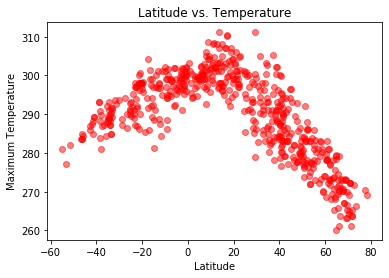

In [8]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker="o", facecolor="red", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Temperature")
plt.savefig("output_data/fig1.png")

#### Latitude vs. Humidity Plot

In [ ]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o", facecolor="blue", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.savefig("output_data/fig2.png")

#### Latitude vs. Cloudiness Plot

In [ ]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o", facecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.savefig("output_data/fig1.png")

#### Latitude vs. Wind Speed Plot

In [ ]:
fig=plt.figure()
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker="o", facecolor="green", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.savefig("output_data/fig1.png")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression